In [1]:
# import packages and set logging
from src.functions.data_extraction import RawDataset
from src.functions.preliminary_summary import Summary
from src.functions.preliminary_data_cleaning import PreliminaryData
from src.functions.exploratory_data_analysis import ExploratoryDataAnalysis
from src.functions.confirmatory_data_analysis import ConfirmatoryDataAnalysis
from src.functions.research_question import ResearchQuestion
import warnings
import logging
import pandas as pd
from src.helper_functions.json_helpers import extract_json_configs

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")


/Users/nixonlum/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Data Extraction

''' 
This script mainly deals with data extraction. It will do the following:
1) locate the ./dataset/raw_dataset folder and read the four csv datasets inside into pandas dataframe
2) Combine the demographics dataframe with the clinical_data dataframe
3) Combine the bill_amount dataframe with the bill_id dataframe
4) Rename a column from 'id' to 'patient_id' for joining downstream of the datapipeline
'''

raw_dataset = RawDataset()
df_clinical_raw, df_bill_raw = raw_dataset.data_extraction()


INFO:root:Extracting Datasets
INFO:root:Combining Relevant Datasets


In [3]:
# Data Summary

'''
This script mainly deals with obtaining data description and summary. It will do the following:
1) Check the dataset for missing data
2) Check the dataset for duplicated rows
3) Check the integrity of the data (eg. binary columns should have 2 classes)
4) Identify outliers in the continuous data
'''

# Set plot to True to show any relevant plots 

summary_clinical = Summary(df_clinical_raw, plot=False)
summary_clinical.summarize()

summary_bill = Summary(df_bill_raw, plot=False)
summary_bill.summarize()


INFO:root:Checking Missing Data
INFO:root:Column with missing data: medical_history_sud - 233 out of 3400 (6.852941176470588 %)
INFO:root:Column with missing data: medical_history_tum - 304 out of 3400 (8.941176470588236 %)
INFO:root:Checking Duplication
INFO:root:No Duplicated Records Detected
INFO:root:Checking Data Integrity
INFO:root:Types of groups found in medical_history_hbp: ['0' '1' 'No' 'Yes']
INFO:root:Types of groups found in cgis_adm: [2 5 6 3 4 7 1]
INFO:root:Types of groups found in cgis_dis: [2 3 5 4 1 6]
INFO:root:Types of groups found in gaf_lv: [2 6 4 5 7 8 3 1]
INFO:root:Types of groups found in gender: ['Male' 'Female' 'm' 'f']
INFO:root:Types of groups found in race: ['Indian' 'Malay' 'Chinese' 'Others' 'chinese' 'India']
INFO:root:Types of groups found in resident_status: ['Singaporean' 'PR' 'Singapore citizen' 'Foreigner']
INFO:root:Identifying Potential Outliers
INFO:root:Checking Missing Data
INFO:root:Checking Duplication
INFO:root:No Duplicated Records Detec

In [4]:
# Preliminary Data Cleaning

'''
This script mainly deals with preliminary data cleaning in response to the findings above. It will do the following:
1) Harmonize datetime data 
2) Collapse common classes within the categorical columns (eg. 'Male' and 'male' are refering to the same class)
3) Re-map categorical columns into integers (eg. 0 and 1)
4) Handle missing data (eg. drop, impute by mean or impute by iterative_imputation (ML method))
5) Check and enforce data integrity
'''

# set method_categorical to 'impute_mode' or 'remove' for handling missing categorical data
# set method_continuous impute_mean or remove or auto for continuous
# set iterative_imputation to True will use Random Forest for imputation and overide other imputation methods (will take 2-3 mins)

preliminary_data = PreliminaryData(df_clinical_raw)
df_clinical_prelim = preliminary_data.prelim_data_cleaning(method_continuous='impute_mean', method_categorical='impute_mode', iterative_imputation=False)
preliminary_data = PreliminaryData(df_bill_raw)
df_bill_prelim = preliminary_data.prelim_data_cleaning(method_continuous='remove', method_categorical='remove', iterative_imputation=False)


INFO:root:Method of Handling Missing Data: Impute Null Values with Mode in medical_history_sud
INFO:root:Method of Handling Missing Data: Impute Null Values with Mode in medical_history_tum


INFO:root:Running Exploratory Data Analysis
INFO:root:Adding new variables derived from currently availables ones
INFO:root:Creating 'hospitalization_duration' from date_of_admission and date_of_discharge
INFO:root:Creating 'cgis_change' from cgis_adm and cgis_dis 
INFO:root:Creating 'cgis_improve' from cgis_change
INFO:root:Creating 'age' from date_of_birth
INFO:root:Running Descriptive Analysis
INFO:root:Nominal or Ordinal Feature/Exposure: medical_history_dia
INFO:root:Sub class 0 : 2825
INFO:root:Sub class 1 : 575
INFO:root:Nominal or Ordinal Feature/Exposure: medical_history_sud
INFO:root:Sub class 0 : 2414
INFO:root:Sub class 1 : 986
INFO:root:Nominal or Ordinal Feature/Exposure: medical_history_hbp
INFO:root:Sub class 0 : 2937
INFO:root:Sub class 1 : 463
INFO:root:Nominal or Ordinal Feature/Exposure: medical_history_ren
INFO:root:Sub class 0 : 3223
INFO:root:Sub class 1 : 177
INFO:root:Nominal or Ordinal Feature/Exposure: medical_history_tum
INFO:root:Sub class 0 : 3202
INFO:roo

Optimization terminated successfully.
         Current function value: 0.610846
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610780
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610858
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610385
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610818
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610312
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610834
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610717
  

INFO:root:medical_history_dia              0.820386
medical_history_sud              0.583416
medical_history_hbp              0.816742
medical_history_ren              0.092063
medical_history_tum              0.299343
medical_history_anx              0.660766
medical_history_mood             0.571245
trt_anx                          0.030137
trt_con                          0.832472
trt_adt                          0.120572
trt_ssr                          0.325175
trt_the                          0.808651
trt_oth                          0.893239
symptom_1                        0.167386
symptom_2                        0.436203
symptom_3                        0.602536
symptom_4                        0.812997
symptom_5                        0.800828
weight                           0.641879
gaf_lv                           0.002384
gender                           0.363305
hospitalization_duration_days    0.212760
age                              0.428637
dtype: float64


Optimization terminated successfully.
         Current function value: 0.608468
         Iterations 5


<Figure size 1500x1500 with 0 Axes>

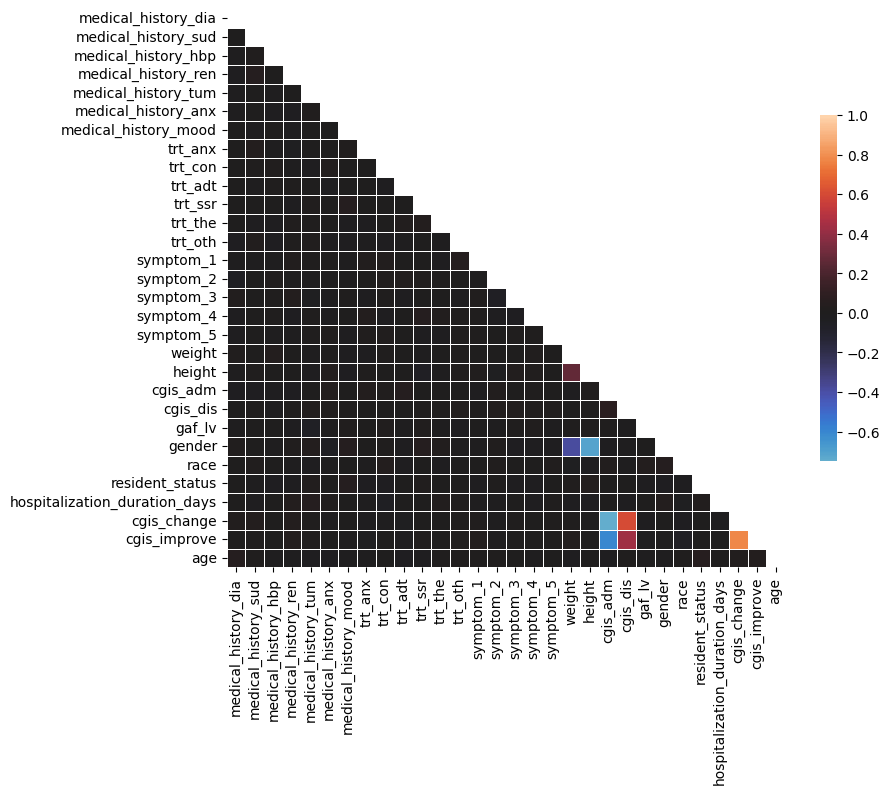

In [5]:
# Exploratory Data Analysis and Secondary Data Cleaning

'''
This script mainly deals with exploratory data analysis which I use to explore the dataset to understand it better.
The data analysis here may not be shown on the powerpoint. It will do the following:
1) Add new variables (eg. cgis_change, cgis_improve)
2) Run descriptive statistics for relevant columns
3) Check normality of continuous variables
4) Check for imbalance categorical variables
5) Run a simple correlation (results only relevant for continuous varaibles)
'''

# Set plot to True to show plots in the EDA

eda = ExploratoryDataAnalysis(df_clinical_prelim, plot=False)
df_clinical_eda = eda.run_analysis()

INFO:root:Obtaining Demographics for patients with improved condition and patients with worsened condition
INFO:root:Continuous Demographic Information


,column,mean,std_dev,median,iqr_lower,iqr_upper
0,weight_df_cgis_status,79.234314,11.038334,NaN,NaN,NaN
0,height_df_cgis_status,NaN,NaN,165.0,160.0,170.0
0,hospitalization_duration_days_df_cgis_status,NaN,NaN,11.0,9.0,13.0
0,age_df_cgis_status,NaN,NaN,55.0,44.0,70.0
0,weight_df_cgis_worsen,78.540210,10.943577,NaN,NaN,NaN
0,height_df_cgis_worsen,NaN,NaN,165.0,160.0,170.0
0,hospitalization_duration_days_df_cgis_worsen,NaN,NaN,11.0,9.0,13.0
0,age_df_cgis_worsen,NaN,NaN,54.0,43.0,69.0


INFO:root:Categorical Demographic Information


,0,1,n_0,n_1,column,2,3,n_2,n_3,4,5,6,7,n_4,n_5,n_6,n_7
0,0.827451,0.172549,844,176.0,medical_history_dia_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.700980,0.299020,715,305.0,medical_history_sud_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.865686,0.134314,883,137.0,medical_history_hbp_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.937255,0.062745,956,64.0,medical_history_ren_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.934314,0.065686,953,67.0,medical_history_tum_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.748039,0.251961,763,257.0,medical_history_anx_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.751961,0.248039,767,253.0,medical_history_mood_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.521569,0.478431,532,488.0,trt_anx_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.402941,0.597059,411,609.0,trt_con_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.189216,0.810784,193,827.0,trt_adt_df_cgis_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


INFO:root:Running Statistical Tests for Demographics
INFO:root:Investigating Patterns of SSR prescription
INFO:root:Are there any treatment which are prescribed only by itself?
INFO:root:Display Results for Single Treatment Therapy


,anx,con,adt,ssr,the,oth
n_patients,6.000000,4.00,13.000000,3.0,14.000000,9.000000
n_improve,0.333333,0.25,0.307692,0.0,0.357143,0.333333


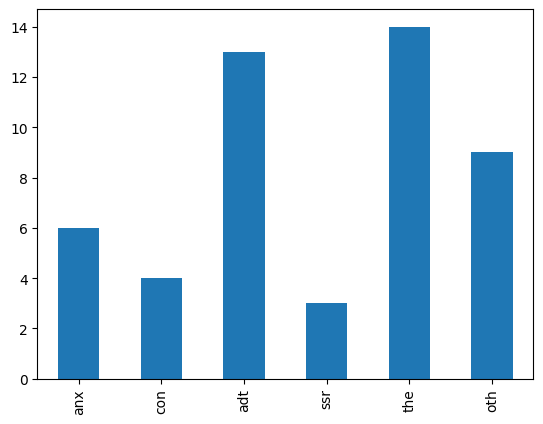

INFO:root:SSRI is present in which treatment combination?
INFO:root:Displaying Results for Combination Treatment that includes SSRIs


,trt_anx,trt_con,trt_adt,trt_the,trt_oth
0,900.0,1056.0,1459.0,1478.0,1321.0


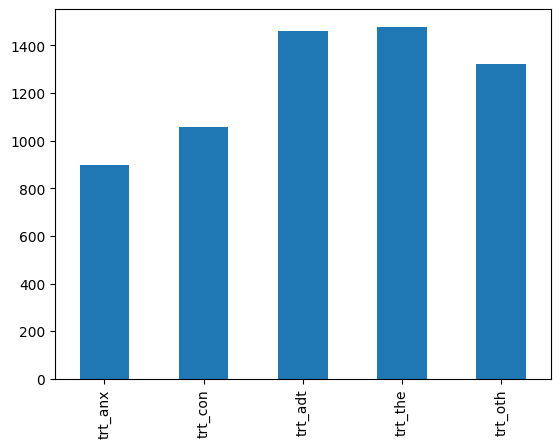

INFO:root:What is the most common combination therapy?
INFO:root:Displaying Results for Most Common Types of Combination Treatment


,count
combination,
All Treatments,277
All Except Anxiolytics and Anticonvulsants,256
All Except Anxiolytics and SSRI,228
All Except SSRI,224
All Except Anticonvulsants,204
All Except Anticonvulsants and SSRI,174
"All Except Anxiolytics, Anticonvulsants and SSRI",173


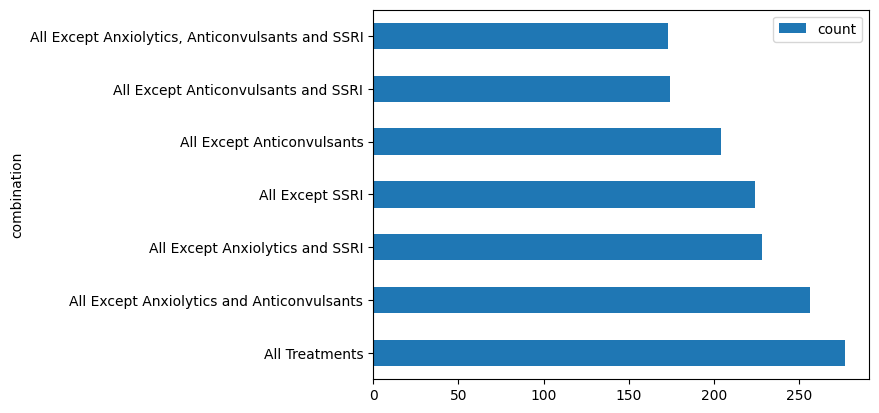

In [6]:
# Confirmatory Data Analysis

'''
This script mainly deals with the investigation for the single treatment and combination treatment using SSRI. 
The analysis conducted here points me towards my research question of investigating the prescription pattern and effectiveness of SSRI
It will do the following:
1. Obtain Demographics data for patients with improvement in cgis and patients with worsened cgis
2. Investigating Patterns of SSRI prescription by looking at single treatment with SSRI and compare it with other single treatments
3. Investigating patterns of SSRI Combination treatment
4. Check what are the most common Combination treatment
'''

cda = ConfirmatoryDataAnalysis(df_clinical_eda, plot=False)
df_clinical_cda, df_demographic_continuous, df_demographic_categorical, df_fisher, df_chi2, df_ttest, df_mannwhitney, df_one_treatment_results, df_multiple_treatment_results, df_combination_therapy = cda.run_analysis()

INFO:root:Obtaining Demographic Informations for Combination Treatment with SSRI and Without SSRI
INFO:root:Continuous Demographic Information


,column,median,iqr_lower,iqr_upper,mean,std_dev
0,weight_df_ssr_comb,79.1,71.2,86.45,NaN,NaN
0,height_df_ssr_comb,165.0,159.0,170.00,NaN,NaN
0,hospitalization_duration_days_df_ssr_comb,11.0,9.0,13.00,NaN,NaN
0,age_df_ssr_comb,54.0,44.0,69.00,NaN,NaN
0,weight_df_no_ssr_combi,NaN,NaN,NaN,78.82665,11.108576
0,height_df_no_ssr_combi,166.0,161.0,171.00,NaN,NaN
0,hospitalization_duration_days_df_no_ssr_combi,11.0,9.0,13.00,NaN,NaN
0,age_df_no_ssr_combi,55.0,44.0,69.00,NaN,NaN


INFO:root:Categorical Demographic Information


,0,1,n_0,n_1,column,2,3,4,5,6,n_2,n_3,n_4,n_5,n_6,7,n_7,8,9,n_8,n_9,10,n_10
0,0.831928,0.168072,1480,299.0,medical_history_dia_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.707139,0.292861,1258,521.0,medical_history_sud_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.864531,0.135469,1538,241.0,medical_history_hbp_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.952782,0.047218,1695,84.0,medical_history_ren_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.937605,0.062395,1668,111.0,medical_history_tum_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.745925,0.254075,1327,452.0,medical_history_anx_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.727937,0.272063,1295,484.0,medical_history_mood_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.494098,0.505902,879,900.0,trt_anx_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.406408,0.593592,723,1056.0,trt_con_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.179876,0.820124,320,1459.0,trt_adt_df_ssr_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


INFO:root:Are there any factors that influence the incorporation of SSR into combination?
INFO:root:Displaying results for medical_history_mood


medical_history_mood
0    670
1    241
Name: count, dtype: int64

medical_history_mood
0    622
1    170
Name: count, dtype: int64

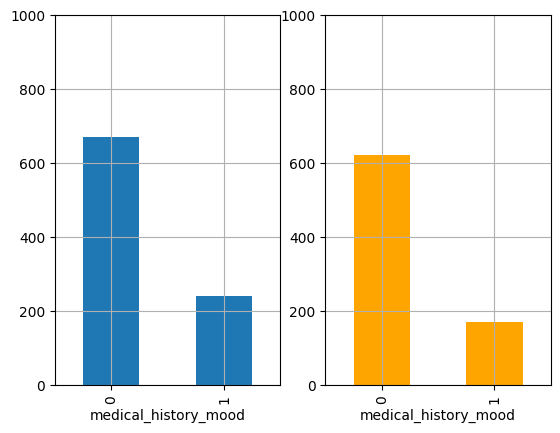

INFO:root:Displaying results for symptom_4


symptom_4
0    222
1    689
Name: count, dtype: int64

symptom_4
0    223
1    569
Name: count, dtype: int64

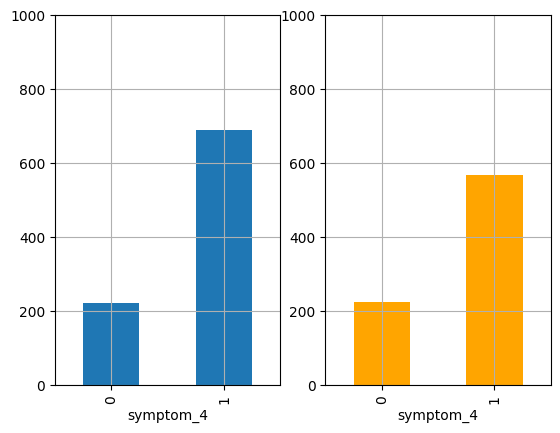

INFO:root:Displaying results for cgis_adm


cgis_adm
1      5
2     73
3    146
4    276
5    224
6    154
7     33
Name: count, dtype: int64

cgis_adm
1      3
2     59
3    112
4    270
5    192
6    131
7     25
Name: count, dtype: int64

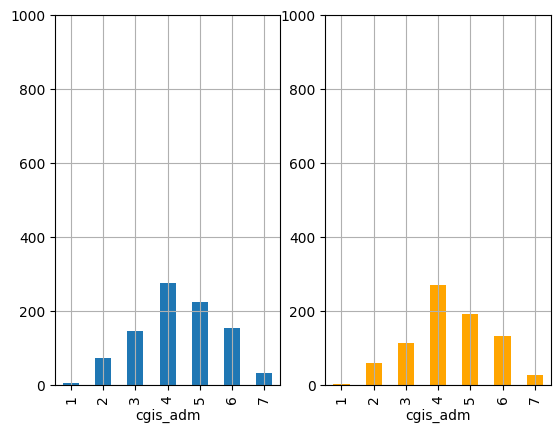

INFO:root:odds ratio: 1.3160842844600527, p-value: 0.019103782661644704
INFO:root:Merging df_bills with df_ssr_comb and df_no_ssr_comb to investigate differences in bills amount
INFO:root:Results for different bills amount
INFO:root:Median: 24026.49


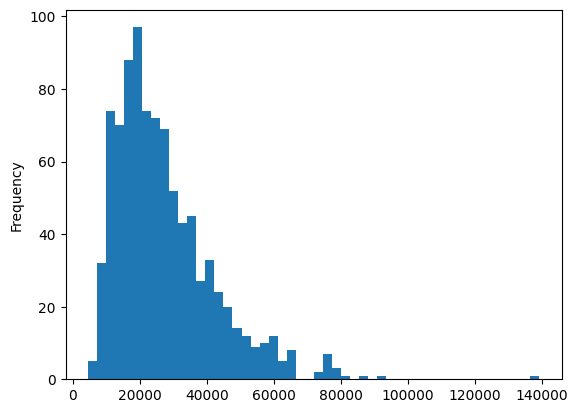

INFO:root:Median: 23648.235


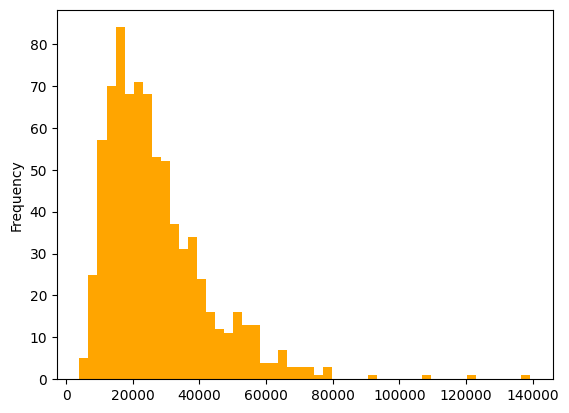

INFO:root:Difference in Median: 378.255000000001
INFO:root:Difference in Mean: 227.87543947987433
INFO:root:Results for different bills amount (normalized)
INFO:root:Median: 2186.99


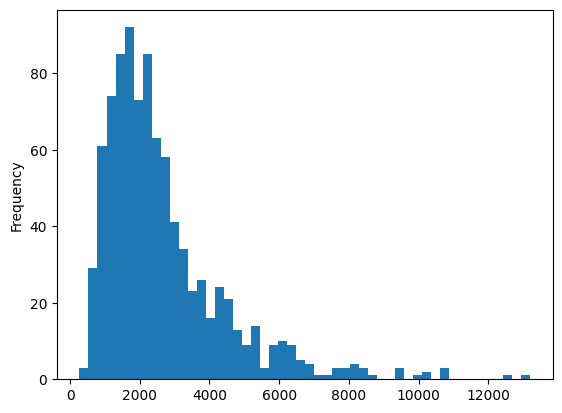

INFO:root:Median: 2209.59


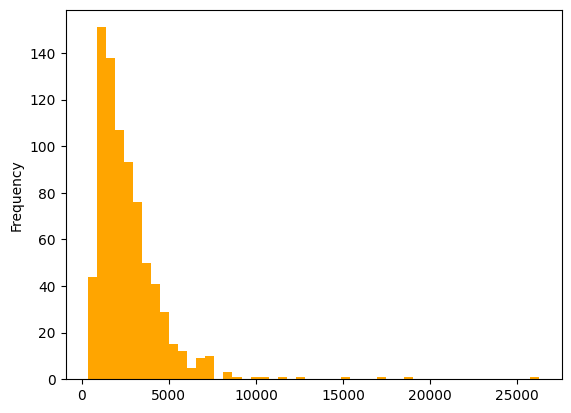

INFO:root:Difference in Median: 22.600000000000364
INFO:root:Difference in Mean: 21.831574014015587
INFO:root:Displaying Results
INFO:root:Running Simple Logistic Regression
INFO:root:Running Multiple Logistic Regression


Optimization terminated successfully.
         Current function value: 0.605199
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605021
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605342
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605155
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604562
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605031
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605335
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605076
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605343
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605154
  

In [7]:
# Data Analysis for Research Question 

'''
This script mainly deals with the questions presented in the powerpoint. It does the following:
1) Obtaining Demographic Informations for Combination Treatment with SSRI and Without SSRI
2) Investigate if there any factors that influence the incorporation of SSR into combination treatment (Statistical Tests)
3) Investigate if SSRI has any effect in the improvement of cgis condition (simple logistic regression and multiple logistic regression)
'''

research_question = ResearchQuestion(df_clinical_cda, df_bill_prelim, plot=False, all_results=False)
df_ssr_demographic_continuous, df_no_ssr_demographic_categorical, df_ssr_comb_fisher, df_ssr_comb_chi2, df_ssr_comb_ttest, df_ssr_comb_mannwhitney, df_ssr_simple_log_regression, df_ssr_multiple_regression = research_question.run_analysis()
